# Análise Exploratória de Dados - Telco Customer Churn

## Objetivo do Projeto

Identificar clientes com alto risco de churn (cancelamento) em uma empresa de telecomunicações, utilizando técnicas de análise exploratória de dados para entender os principais fatores que influenciam o cancelamento.

## Sobre o Dataset

- **Fonte:** Kaggle - Telco Customer Churn Dataset
- **Registros:** 7.043 clientes
- **Variáveis:** 21 features (demográficas, serviços contratados, informações de conta)
- **Target:** Churn (Yes/No)
- **Taxa de Churn:** 26.5%

## Principais Questões de Negócio

1. Qual o perfil dos clientes que fazem churn?
2. Quais fatores (tenure, contrato, pagamento, serviços) mais influenciam o cancelamento?
3. Qual o impacto financeiro do churn atual?
4. Como a empresa pode reduzir a taxa de churn?

## 1. Setup e Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## 2. Carregamento e Visão Geral dos Dados

In [2]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3. Análise da Variável Target (Churn)

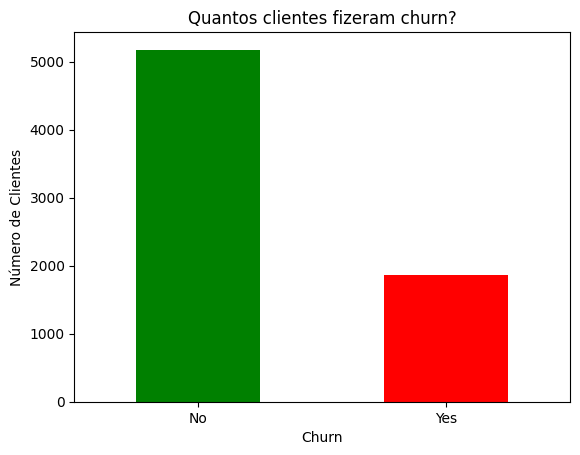

In [5]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Quantos clientes fizeram churn?')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) 
plt.show()

### 3.1 Interpretação

**Distribuição:**
- 73% dos clientes permanecem (Não)
- 27% fazem churn (Sim)

**Análise:**
- Dataset levemente desbalanceado
- Taxa de churn de 27% é significativa para o negócio
- Representa aproximadamente 1 em cada 4 clientes

## 4. Análise de Variáveis Numéricas

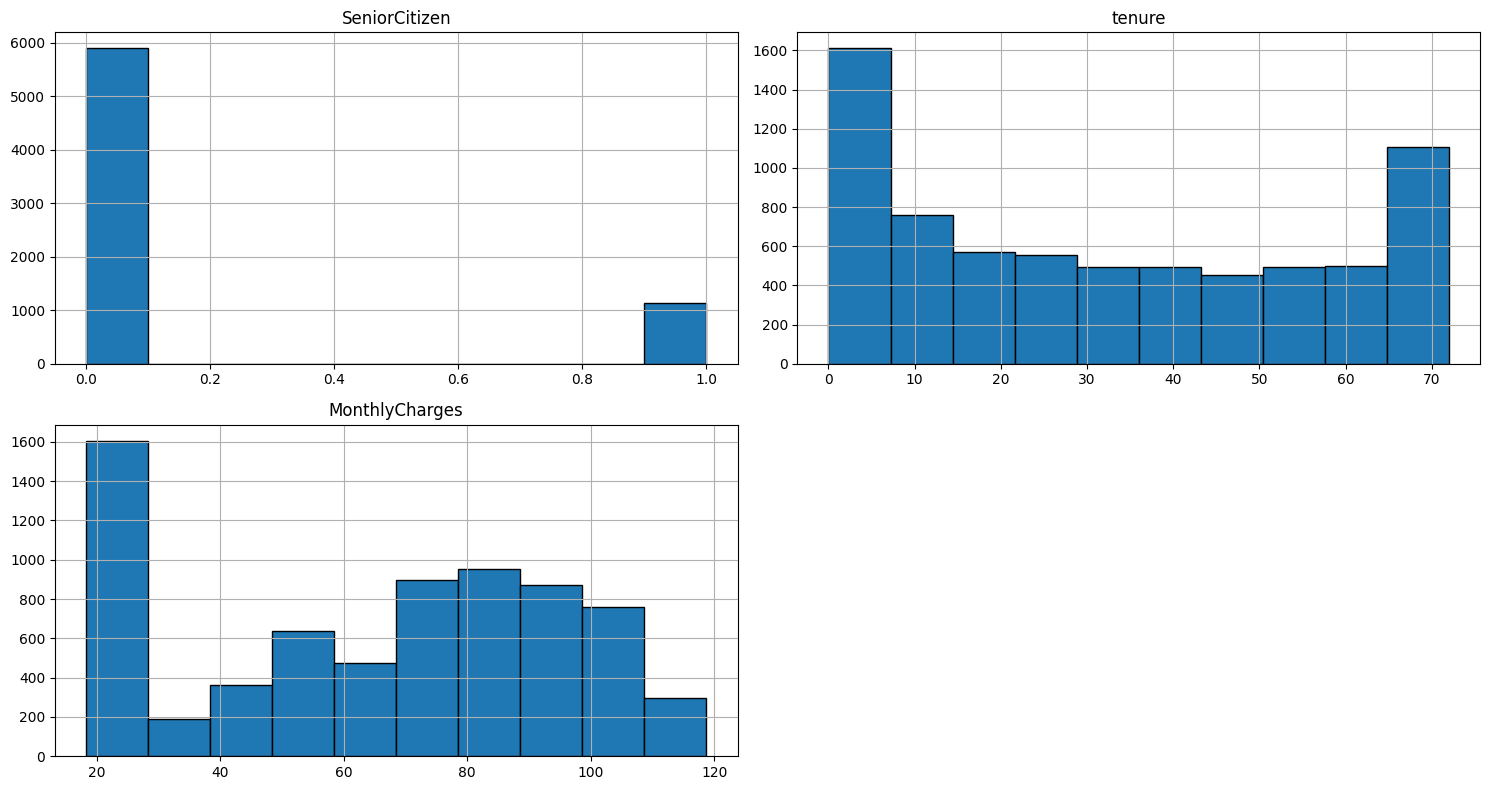

In [7]:
# Identifica colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualiza distribuição
df[numeric_cols].hist(bins=10, figsize=(15, 8), edgecolor='black')
plt.tight_layout()
plt.show()

### 4.1 Observações das Distribuições

- Temos um distribuição bimodal, com um pico no inicio e outro no final
- Clientes novos predominam
- Distribuição assimétrica à direita em MonthlyCharges, Clientes com a cobrança mensal média de 20 predominam

### 4.2 Relação entre Variáveis Numéricas e Churn

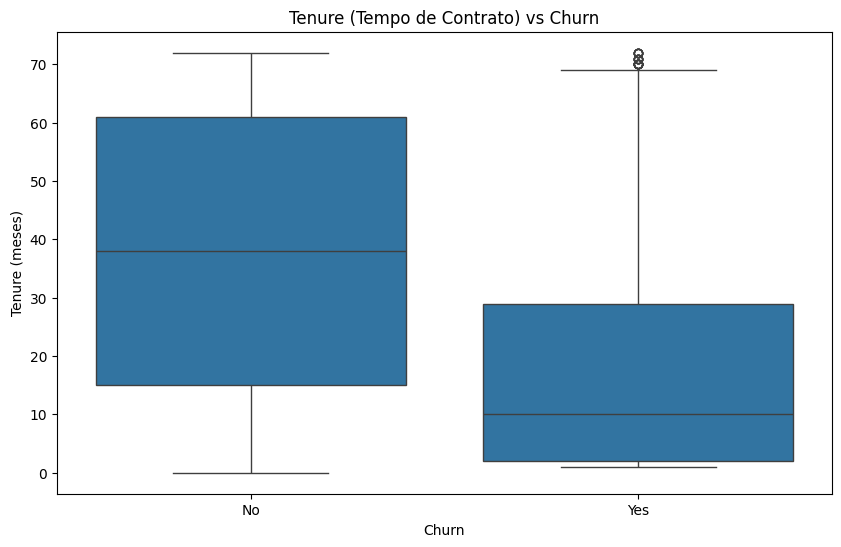

In [8]:
# Tenure VS Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure (Tempo de Contrato) vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (meses)')
plt.show()

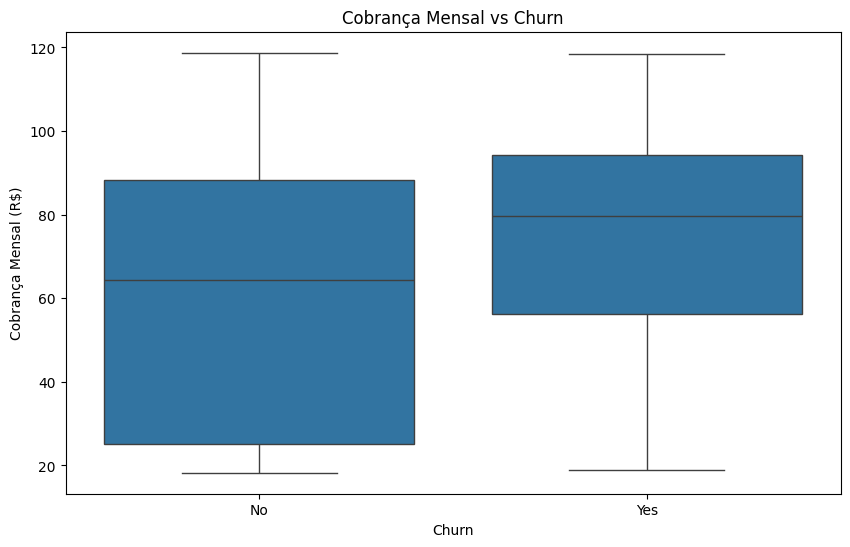

In [9]:
# Cobrança Mensal VS Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cobrança Mensal vs Churn')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal (R$)')
plt.show()

### 4.3 Interpretação das Variáveis Numéricas

**Colunas numéricas encontradas:**
SeniorCitizen, tenure, MonthlyCharges

**Distribuição de Tenure:**
Distribuição bimodal com um pico no início para clientes novos (0-10 meses) e muitos clientes antigos (60-72 meses). Poucos clientes na faixa média.

**Tenure vs Churn:**
Grande parte dos clientes que saem têm tenure menor, o que indica que clientes novos tendem mais a fazer churn

**MonthlyCharges vs Churn:**
Clientes que saem pagam valores relativamente altos. Isso acontece pois, como são novos, ainda não conheceram de fato o serviço para justificar um valor alto.

**Insights:**
1. Clientes novos (tenure < 12 meses) são o grupo de maior risco
2. Cobrar alto de clientes novos aumenta significativamente o churn
3. AÇÃO: Empresa deveria oferecer preços promocionais nos primeiros meses para reter novos clientes até eles perceberem valor

## 5. Recomendações Estratégicas para Retenção

### 5.1 Período Promocional para Novos Clientes

**Ação:** Descontos nos primeiros 3-6 meses

**Objetivo:** Aumenta a chance de passarem da fase de teste (fase crítica de perdas)

### 5.2 Onboarding Reforçado

**Ação:** Educar o cliente sobre os benefícios

**Objetivo:** Mostrar valor logo no início do serviço

### 5.3 Monitoramento de Clientes em Risco

**Ação:** Alerta para tenure < 6 meses + MonthlyCharges alto

**Objetivo:** Ação proativa como ligar, oferecer suporte, desconto (atenção redobrada nesses clientes)

## 6. Análise de Coortes por Tenure

### 6.1 Hipóteses sobre Distribuição Bimodal

**Hipóteses:**
- **Muitos clientes novos (0-12 meses):** Alguma campanha de marketing recente
- **Muitos clientes antigos (60-72 meses):** Serviço realmente tem qualidade
- **Poucos no meio (12-24 meses):** Serviço sem promoção inicial, sem incentivo para se manter, empresa não cria vínculo inicialmente

/var/folders/wm/rt8t_wn575169b8q43c5mrg00000gn/T/ipykernel_2224/2386845933.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


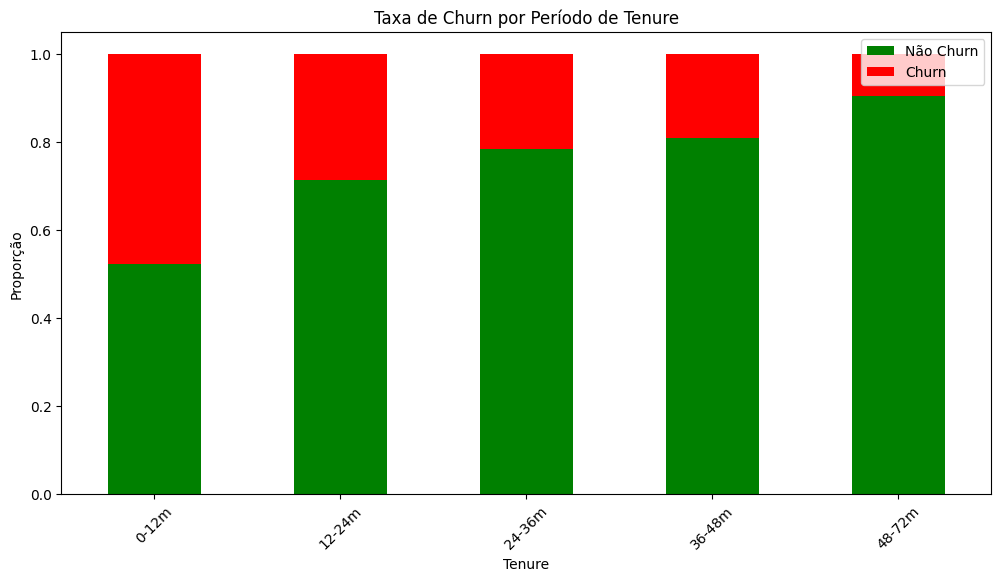

In [10]:
# Cria grupos de tenure
df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[0, 12, 24, 36, 48, 72], 
                             labels=['0-12m', '12-24m', '24-36m', '36-48m', '48-72m'])

# Calcula taxa de churn por grupo
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()

# Visualização
churn_by_tenure.plot(kind='bar', stacked=True, figsize=(12, 6), 
                     color=['green', 'red'])
plt.title('Taxa de Churn por Período de Tenure')
plt.xlabel('Tenure')
plt.ylabel('Proporção')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.show()

### 6.2 Programa de Retenção Proposto

Baseado na análise de coortes, propomos ações segmentadas:

#### Para clientes 0-6 meses (tenure baixo):
**Ação:** Oferta exclusiva válida apenas para a primeira assinatura - 20% off ao assinar por 6 meses

**Justificativa:** Reduz a barreira inicial de preço e cria compromisso de médio prazo

#### Para clientes 6-12 meses (ainda em risco):
**Ação:** Desconto progressivo por tempo de casa - 5% a cada 6 meses
- A partir de 6 meses: 5%
- Com 12 meses: 10%
- Limitado a 20%

**Justificativa:** Incentiva renovação contínua e cria sensação de recompensa pela fidelidade

#### Para clientes 12+ meses (começando a fidelizar):
**Ação:** Programa de indicação para clientes fiéis - a cada 3 indicados que assinarem por pelo menos 1 mês, você ganha 1 mês gratuito

**Justificativa:** Transforma clientes fiéis em vendedores da marca e reforça vínculo emocional

## 7. Análise de Variáveis Categóricas

### 7.1 Contract vs Churn

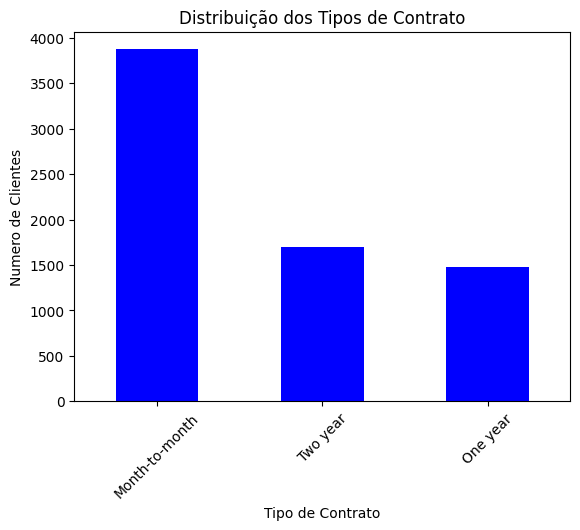

In [11]:
contract_counts = df['Contract'].value_counts()

contract_counts.plot(kind='bar', color='blue')
plt.title('Distribuição dos Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=45)
plt.show()

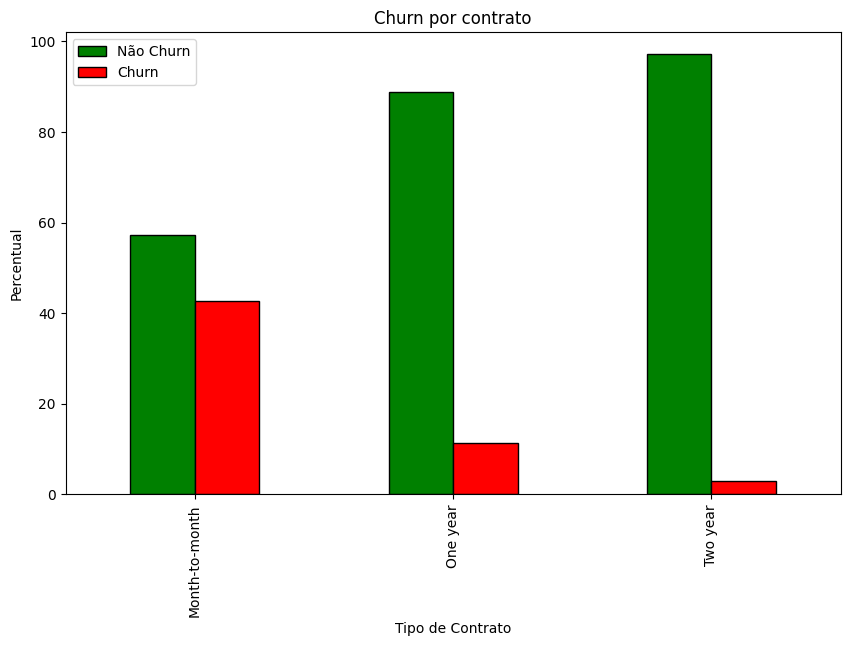

In [12]:
# Tabela cruzada: Contract vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', figsize=(10, 6),
                    color=['green', 'red'], edgecolor='black')
plt.title('Churn por contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Percentual')
plt.legend(['Não Churn', 'Churn'])
plt.show()

### 7.1.1 Interpretação - Contract

**Tipo com maior churn:** Contrato Mês a Mês (57% de taxa de churn)

**Tipo com menor churn:** Contrato de 2 anos

**Interpretação:**
- Contratos mês a mês servem apenas para suprir curiosidade inicial
- Não permitem ao cliente conhecer totalmente o serviço
- Falta de compromisso de longo prazo aumenta propensão ao cancelamento

**Ação de negócio:**
- Ações de marketing e onboarding reforçado (tutorial, suporte prioritário)
- Aumentar percepção de valor para influenciar cliente a iniciar com contrato de maior duração
- Incentivos para migração de Month-to-month para contratos anuais/bianuais

### 7.2 PaymentMethod vs Churn

In [ ]:
# Tabela cruzada: PaymentMethod vs Churn
paymant_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

paymant_churn.plot(kind='bar', color=['green', 'red'],
                   figsize=(10, 6), edgecolor='black')
plt.title('Churn por método de pagamento')
plt.xlabel('Método de pagamento')
plt.ylabel('Percentual')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.2.1 Interpretação - PaymentMethod

**Método com maior churn:** Cheque eletrônico

**Interpretação:**
- Método de pagamento mais complicado gera incômodo na hora de pagar
- Cada pagamento manual é uma oportunidade de repensar a assinatura
- Falta de automação aumenta fricção

**Ação de negócio:**
- Oferecer parcelamento sem juros para cartão de crédito
- Desconto de 10% para transferência bancária
- Campanha educativa sobre débito automático ("pague e esqueça")

### 7.3 Tipo de Internet vs Churn

In [ ]:
# Tabela cruzada serviço de internet x churn
internetService_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

# Visualização
internetService_churn.plot(kind='bar', color=['green', 'red'],
                            figsize=(12, 6), edgecolor='black')

plt.title('Taxa de Churn por Tipo de Serviço de Internet', fontsize=14, fontweight='bold')
plt.xlabel('Serviço de Internet', fontsize=11)
plt.ylabel('Percentual (%)', fontsize=11)
plt.legend(['Não Churn', 'Churn'], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Idosos por tipo de internet
internet_senior = pd.crosstab(df['InternetService'], df['SeniorCitizen'], normalize='index') * 100

internet_senior.plot(kind='bar', stacked=True, figsize=(10, 6), 
                     color=['steelblue', 'coral'], edgecolor='black')
plt.title('Proporção de Idosos por Tipo de Internet', fontweight='bold', fontsize=13)
plt.xlabel('Tipo de Internet')
plt.ylabel('Percentual (%)')
plt.legend(['Não Idoso', 'Idoso'], title='SeniorCitizen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Análise CRÍTICA: Churn de idosos vs não-idosos dentro de Fiber Optic
fiber_clients = df[df['InternetService'] == 'Fiber optic'].copy()

fiber_senior_churn = pd.crosstab(fiber_clients['SeniorCitizen'], 
                                  fiber_clients['Churn'], 
                                  normalize='index') * 100

print("Taxa de Churn em Fiber Optic por Idade (%):")
print(fiber_senior_churn.round(1))

In [ ]:
# Análise CRÍTICA: Churn de idosos vs não-idosos dentro de Fiber Optic
fiber_clients = df[df['InternetService'] == 'Fiber optic'].copy()

fiber_senior_churn = pd.crosstab(fiber_clients['SeniorCitizen'], 
                                  fiber_clients['Churn'], 
                                  normalize='index') * 100

print("Taxa de Churn em Fiber Optic por Idade (%):")
print(fiber_senior_churn.round(1))

### 7.3.1 Interpretação - Tipo de Internet

**Principais descobertas:**
- **Fiber optic:** 42% de churn
- **DSL:** ~25% de churn
- **No internet service:** 7% de churn (3x menor que DSL)
- **Diferença total:** 35% entre maior e menor

**Por que Fiber Optic tem alto churn?**

**Custo-benefício**
- Preço elevado gera expectativa alta
- Qualquer insatisfação = propensão ao cancelamento

**Mercado altamente competitivo**
- Concorrentes fazem ofertas agressivas
- Facilidade de troca entre operadoras

**Perfil Conservador**
- 42% dos clientes Fiber são idosos (SeniorCitizen)
- **Idosos com Fiber: 47.3% de churn** vs não-idosos: 39.9%
- Complexidade técnica (configuração, wi-fi, apps) gera frustração

**Análise: Por que "No internet" tem baixo churn?**

**Perfil conservador e estável**
- Apenas telefone fixo (necessidade básica)
- Maior inércia para mudanças

**Simplicidade do serviço**
- Baixa expectativa, difícil decepcionar
- Poucos pontos de falha

**Preço acessível**
- Baixa sensibilidade a variações de custo

**Ações de negócio:**

**CRÍTICO - Idosos + Fiber (47.3% churn):**
1. Programa "Fiber Sênior": instalação assistida + treinamento presencial
2. Plano intermediário com preço ajustado -20% para perfil idoso
3. Suporte técnico prioritário e especializado
4. Opção de downgrade Fiber → DSL sem multa nos primeiros 6 meses

**Para Fiber em geral:**
1. SLA rigoroso de qualidade (velocidade garantida)
2. Programa de fidelidade agressivo (descontos progressivos)
3. Comunicação clara de diferenciais vs concorrentes

**Para "No internet":**
1. Manter preços competitivos
2. Não forçar upsell (risco de gerar churn desnecessário)

### 7.4 Telefone vs Churn

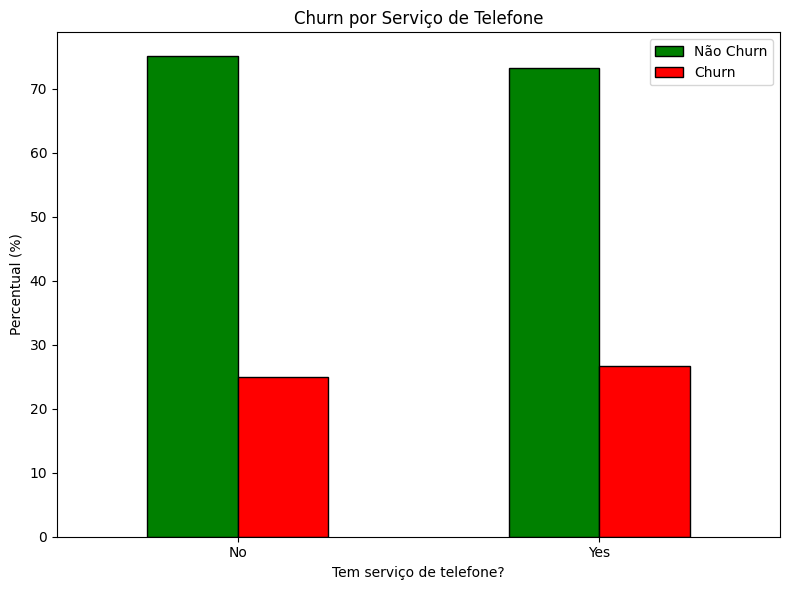

In [13]:
# Tabela cruzada: PhoneService vs Churn
phone_churn = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100

phone_churn.plot(kind='bar', color=['green', 'red'],
                 figsize=(8, 6), edgecolor='black')
plt.title('Churn por Serviço de Telefone')
plt.xlabel('Tem serviço de telefone?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.4.1 Interpretação - PhoneService

**Descoberta:** Diferença insignificante (~1%)
- Com telefone: 27% churn
- Sem telefone: 26% churn

**Conclusão:**
- PhoneService **não é um driver de churn** significativo
- Pode ser removida de modelos preditivos (feature com baixo poder discriminativo)

### 7.5 Suporte Técnico vs Churn

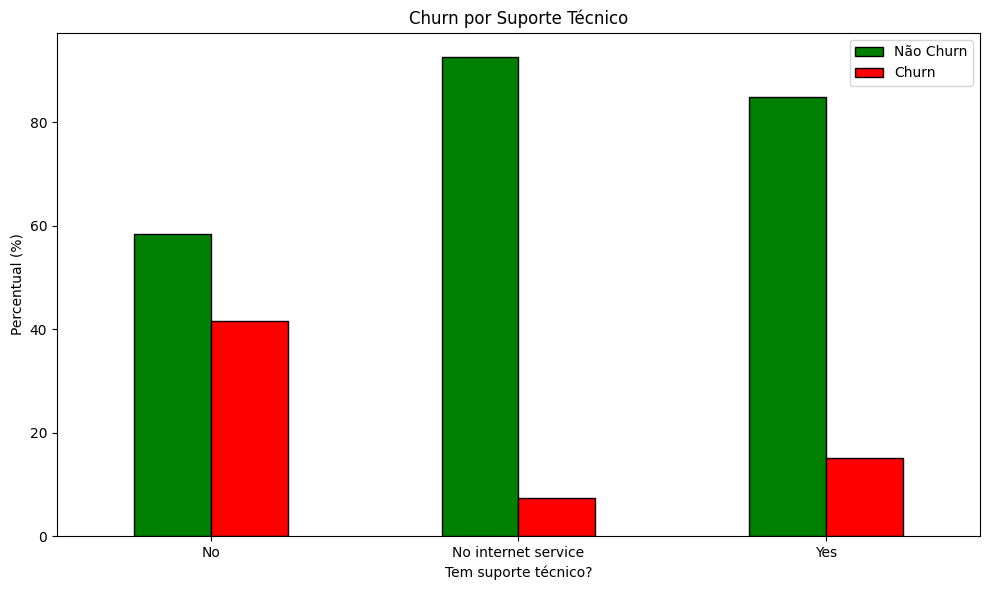

In [14]:
# Tabela cruzada: TechSupport vs Churn
tech_churn = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100

tech_churn.plot(kind='bar', color=['green', 'red'],
                figsize=(10, 6), edgecolor='black')
plt.title('Churn por Suporte Técnico')
plt.xlabel('Tem suporte técnico?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.5.1 Interpretação - TechSupport

**Descoberta CRÍTICA:**
- **Sem TechSupport:** 42% de churn
- **Com TechSupport:** 15% de churn
- **Diferença:** 27 pontos percentuais (quase 3x menor!)

**Por que é tão impactante?**

**1. Resolução rápida de problemas**
- Cliente não fica sem serviço por dias
- Frustração é convertida em satisfação

**2. Percepção de valor**
- "A empresa se importa comigo"
- Suporte = segurança/confiança

**3. Reduz gatilhos de churn**
- Problema técnico sem suporte → busca concorrente
- Problema técnico com suporte → fidelização

**Ações de negócio:**

**CRÍTICO - Oferecer TechSupport gratuitamente para perfis de risco:**
1. Idosos com Fiber Optic (47% churn) → TechSupport obrigatório sem custo
2. Contratos Month-to-month nos primeiros 6 meses → TechSupport grátis
3. Clientes com Multiple Lines + Fiber → bundle com TechSupport incluso

**Geral:**
1. Campanha de upgrade: "Adicione TechSupport por apenas $X/mês"
2. Trial gratuito de 3 meses para clientes sem o serviço
3. Comunicar casos de sucesso ("problema resolvido em X minutos")

### 7.6 Segurança Online vs Churn

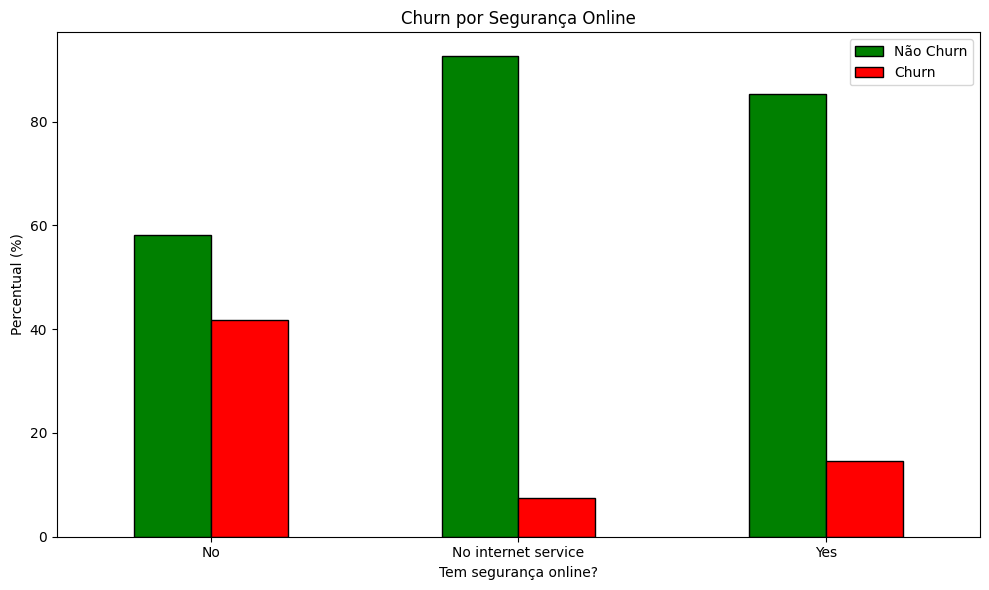

In [15]:
# Tabela cruzada: OnlineSecurity vs Churn
security_churn = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100

security_churn.plot(kind='bar', color=['green', 'red'],
                    figsize=(10, 6), edgecolor='black')
plt.title('Churn por Segurança Online')
plt.xlabel('Tem segurança online?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.6.1 Interpretação - OnlineSecurity

**Descoberta:**
- **Sem OnlineSecurity:** 42% de churn
- **Com OnlineSecurity:** 15% de churn
- **Diferença:** 27 pontos percentuais (padrão similar ao TechSupport!)

**Por que é relevante?**

**1. Proteção = Valor percebido**
- Cliente sente que está protegido contra ameaças
- Menor preocupação com vírus, fraudes, invasões

**2. Sticky service (serviço "grudento")**
- Uma vez configurado, cliente não quer perder a proteção
- Criar dependência positiva

**3. Reduz fricção**
- Menos problemas técnicos causados por malware
- Menos motivos para insatisfação

**Ações de negócio:**

**Bundle estratégico:**
1. OnlineSecurity + TechSupport como "Pacote Proteção Total"
2. Desconto de 15% vs compra separada
3. Marketing: "Durma tranquilo, estamos protegendo você"

**Targets prioritários:**
1. Clientes Fiber sem OnlineSecurity (alto churn + alta necessidade)
2. Idosos (perfil conservador, valorizam segurança)
3. Clientes com Multiple Lines (mais dispositivos = mais risco)

**Trial gratuito:**
- 2 meses grátis para novos clientes
- Após trial, conversão automática com opt-out

### 7.7 Backup Online vs Churn

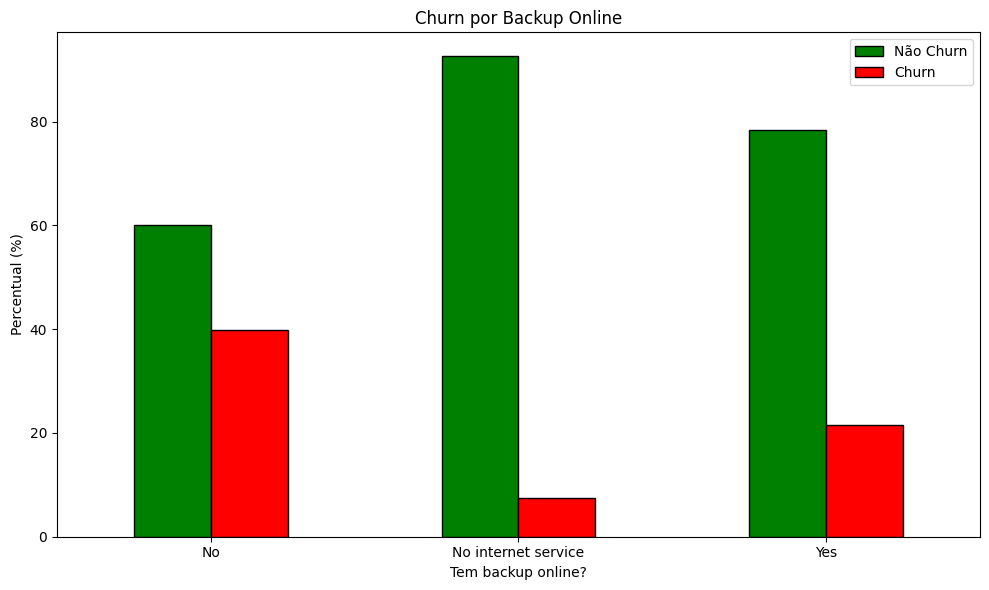

In [17]:
# Tabela cruzada: OnlineBackup vs Churn
backup_churn = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index') * 100

backup_churn.plot(kind='bar', color=['green', 'red'],
                  figsize=(10, 6), edgecolor='black')
plt.title('Churn por Backup Online')
plt.xlabel('Tem backup online?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.7.1 Interpretação - OnlineBackup

**Descoberta:**
- **Sem OnlineBackup:** 40% de churn
- **Com OnlineBackup:** 22% de churn
- **Diferença:** 18 pontos percentuais

**Comparação com outros add-ons:**
- TechSupport: 27 p.p. de diferença 
- OnlineSecurity: 27 p.p. de diferença 
- OnlineBackup: 18 p.p. de diferença 

**Por que é importante (mas menos crítico)?**

**1. Menos urgente que Security/Support**
- Backup é preventivo (cliente não sente falta até precisar)
- Security e Support resolvem problemas imediatos

**2. Lock-in effect moderado**
- Uma vez que o cliente tem backup, teme perder dados ao trocar
- Mas é possível migrar backups entre serviços

**3. Valor percebido crescente**
- Quanto mais tempo usa, mais dados armazenados
- Maior o "custo" de sair

**Ações de negócio:**

**Bundle "Proteção Completa":**
1. TechSupport + OnlineSecurity + OnlineBackup
2. Preço promocional agressivo (3 por 2)
3. Marketing: "Você e seus dados 100% protegidos"

**Estratégia de upsell:**
1. Prioridade: TechSupport e OnlineSecurity (maior impacto)
2. OnlineBackup como complemento natural
3. Trial de 3 meses para demonstrar valor

**Comunicação:**
- "1 em cada 3 pessoas perde dados importantes por ano"
- "Já imaginou perder todas as suas fotos de família?"

### 7.8 Proteção de Dispositivo vs Churn

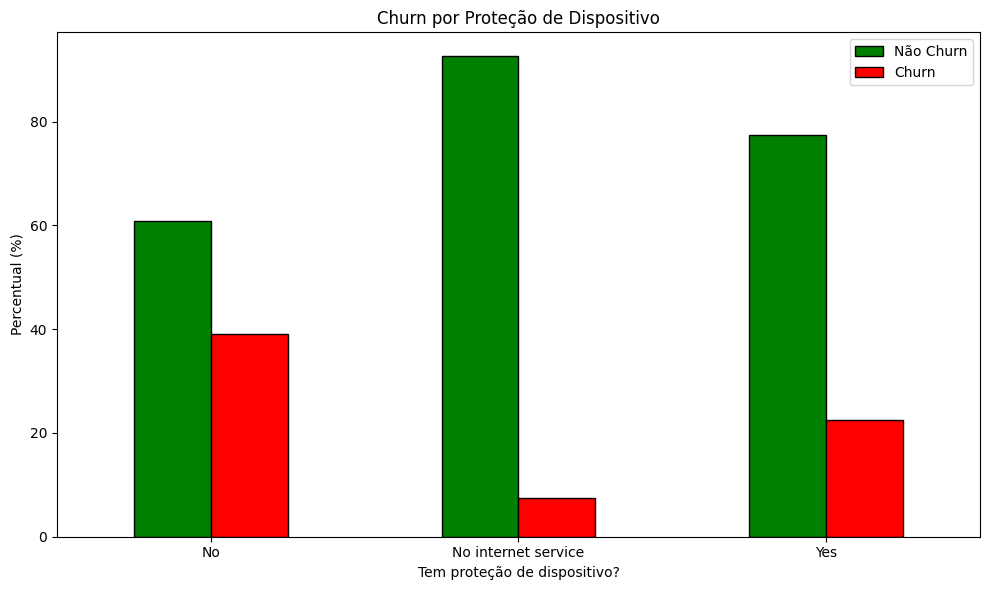

In [18]:
# Tabela cruzada: DeviceProtection vs Churn
device_churn = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index') * 100

device_churn.plot(kind='bar', color=['green', 'red'],
                  figsize=(10, 6), edgecolor='black')
plt.title('Churn por Proteção de Dispositivo')
plt.xlabel('Tem proteção de dispositivo?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.8.1 Interpretação - DeviceProtection

**Descoberta:**
- **Sem DeviceProtection:** 39% de churn
- **Com DeviceProtection:** 23% de churn
- **Diferença:** 16 pontos percentuais

**Ranking de impacto dos add-ons:**
1. **TechSupport:** 27 p.p. (CRÍTICO)
2. **OnlineSecurity:** 27 p.p. (CRÍTICO)
3. **OnlineBackup:** 18 p.p. 
4. **DeviceProtection:** 16 p.p. 

**Por que DeviceProtection tem menor impacto?**

**1. Menos sticky**
- Cliente pode contratar seguro separado (operadora, fabricante)
- Não cria dependência forte como backup ou security

**2. Uso eventual**
- Maioria nunca aciona (dispositivo não quebra)
- Valor percebido só surge em caso de sinistro

**3. Custo-benefício questionável**
- Muitos clientes preferem "arriscar" e economizar
- Dispositivos modernos são mais resistentes

**Ações de negócio:**

**Não priorizar isoladamente:**
- DeviceProtection sozinho tem ROI baixo
- Incluir em bundles completos

**Bundle "Família Protegida":**
1. Multiple Lines + DeviceProtection para todos + OnlineSecurity
2. Desconto progressivo: 2 linhas (10% off), 3+ linhas (20% off)
3. Marketing: "Proteja toda a família por menos"

**Target específico:**
- Famílias com crianças/adolescentes (maior risco de quebra)
- Profissionais que dependem do celular (vendedores, autônomos)
- Evitar push agressivo para perfil conservador/idoso

### 7.9 Streaming de TV vs Churn

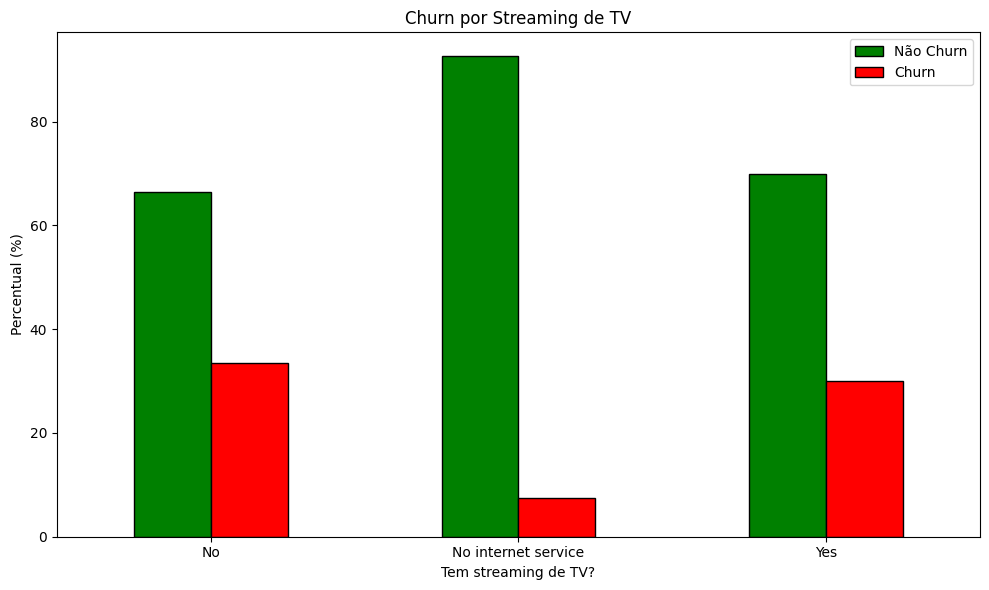

In [19]:
# Tabela cruzada: StreamingTV vs Churn
tv_churn = pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100

tv_churn.plot(kind='bar', color=['green', 'red'],
              figsize=(10, 6), edgecolor='black')
plt.title('Churn por Streaming de TV')
plt.xlabel('Tem streaming de TV?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.9.1 Interpretação - StreamingTV

**Descoberta:**
- **Sem StreamingTV:** 34% de churn
- **Com StreamingTV:** 30% de churn
- **Diferença:** Apenas 4 pontos percentuais

**Por que baixo impacto?**

**1. Mercado saturado**
- Netflix, Disney+, Prime Video, HBO Max...
- Cliente já tem outras opções, não depende da operadora

**2. Commodity service**
- Não é diferencial competitivo
- Qualquer concorrente oferece similar

**3. Perfil de uso**
- Streaming é "nice to have", não "must have"
- Cliente cancela fácil se não usar muito

**Comparação: StreamingTV vs Proteção**
- **TechSupport:** 27 p.p. (7x mais impacto!)
- **OnlineSecurity:** 27 p.p. (7x mais impacto!)
- **StreamingTV:** 4 p.p. (quase irrelevante)

**Ações de negócio:**

**Não focar em retenção via StreamingTV:**
- Baixo poder de fidelização
- Melhor usar como brinde/atrativo inicial

**Estratégia correta:**
1. **Brinde** para novos clientes (3 meses grátis)
2. **Bundle** com StreamingMovies (2x1)
3. **Não investir** em melhorias técnicas ou conteúdo exclusivo
4. **Priorizar** add-ons de proteção (maior ROI em retenção)

**Exceção - Nicho específico:**
- Idosos sem outras assinaturas de streaming
- Pode ser diferencial para esse público específico

### 7.10 Streaming de Filmes vs Churn

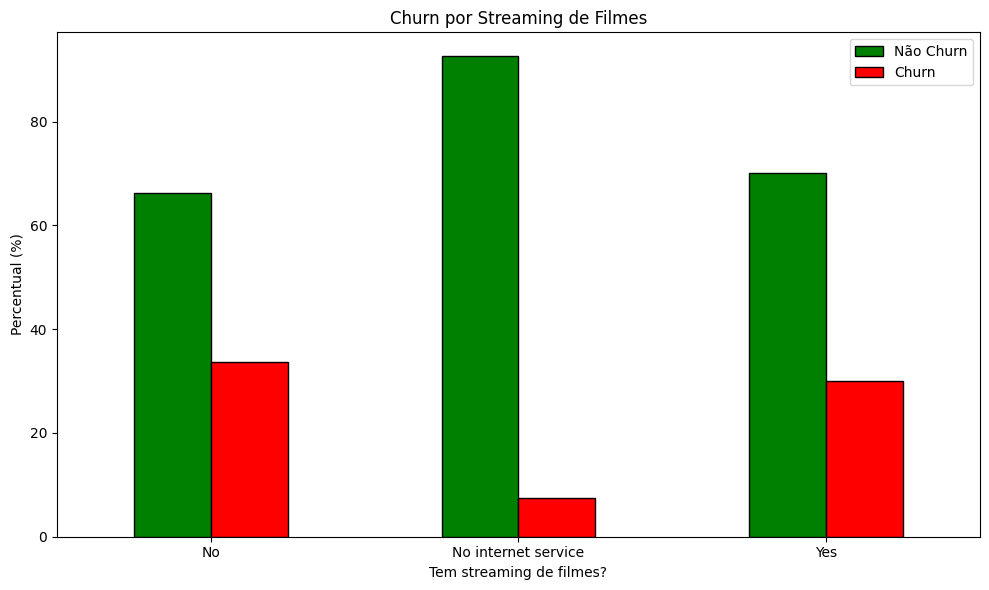

In [21]:
# Tabela cruzada: StreamingMovies vs Churn
movies_churn = pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100

movies_churn.plot(kind='bar', color=['green', 'red'],
                  figsize=(10, 6), edgecolor='black')
plt.title('Churn por Streaming de Filmes')
plt.xlabel('Tem streaming de filmes?')
plt.ylabel('Percentual (%)')
plt.legend(['Não Churn', 'Churn'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7.10.1 Interpretação - StreamingMovies

**Descoberta:**
- **Sem StreamingMovies:** 34% de churn
- **Com StreamingMovies:** 30% de churn
- **Diferença:** Apenas 4 pontos percentuais (idêntico ao StreamingTV!)

**Conclusão - Serviços de Streaming:**
- **StreamingTV:** 4% de diferença
- **StreamingMovies:** 4% de diferença
- **Padrão claro:** Baixo poder de retenção

**Por que streamings não retêm?**

**1. Não são diferenciais**
- Mercado externo dominado (Netflix, Disney+, etc)
- Cliente não associa streaming com operadora de telecom

**2. Fácil substituição**
- Cancelar e contratar outro serviço facil
- Sem custo de mudança

**3. Valor percebido baixo**
- Cliente não vê como necessidade
- Vê como entretenimento opcional

**Ranking FINAL de impacto na retenção:**

**CRÍTICOS (20%+):**
1. TechSupport: 27%
2. OnlineSecurity: 27%

**IMPORTANTES (15&-20%):**
3. OnlineBackup: 18%
4. DeviceProtection: 16%

**BAIXO IMPACTO (<10%):**
5. StreamingTV: 4%
6. StreamingMovies: 4%
7. PhoneService: 1%

**Ações de negócio - Streamings:**

**O que NÃO fazer:**
- Investir em conteúdo exclusivo
- Usar como principal argumento de retenção
- Criar campanhas focadas só em streaming

**O que fazer:**
- Usar como **brinde** para atrair novos clientes
- Bundle "Entretenimento" (TV + Movies por preço único baixo)
- **Priorizar orçamento** em TechSupport e OnlineSecurity
- Comunicar streaming como "bonus", não como core value

## 8. Segmentação de Clientes de Alto Risco

### 8.1 Perfil Combinado de Alto Risco

Clientes que combinam os seguintes fatores:
- Contrato Month-to-month
- Pagamento via cheque eletrônico
- Tenure < 12 meses
- MonthlyCharges > $70

In [26]:
# Filtra clientes de alto risco
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['PaymentMethod'] == 'Electronic check') &
    (df['tenure'] < 12) &
    (df['MonthlyCharges'] > 70)
]

# Calcula taxa de churn nesse grupo
churn_rate_high_risk = high_risk['Churn'].value_counts(normalize=True) * 100

print('Taxa de churn para clientes de alto risco:')
print(churn_rate_high_risk)
print(f"\nTotal de clientes neste perfil: {len(high_risk)}")

Taxa de churn para clientes de alto risco:
Churn
Yes    70.840787
No     29.159213
Name: proportion, dtype: float64

Total de clientes neste perfil: 559


## 9. Análise de Correlações

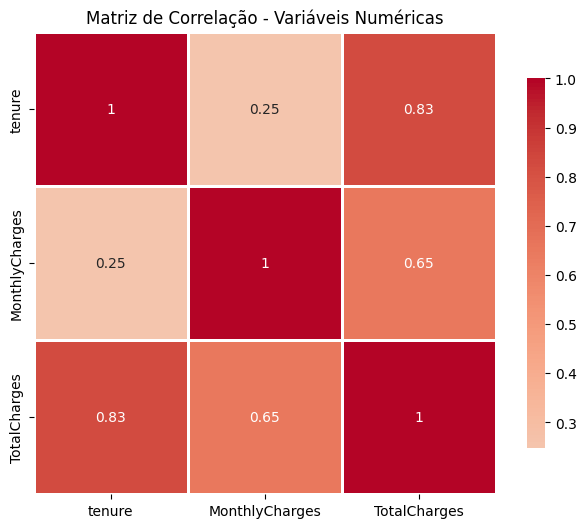

In [27]:
# Seleciona variáveis numéricas para correlação
numeric_data = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# Converte TotalCharges para numérico (caso necessário)
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'], errors='coerce')

# Calcula matriz de correlação
correlation = numeric_data.corr()

# Visualização
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

### 9.1 Interpretação das Correlações

**tenure e TotalCharges têm correlação alta?**
- Sim (0.83), pois se tenure sobe, TotalCharges também deve subir
- Correlação forte e esperada

**MonthlyCharges e TotalCharges têm correlação?**
- Sim (0.65), correlação moderada
- TotalCharges é influenciado pela multiplicação de MonthlyCharges por tenure
- Se qualquer uma das duas variáveis sobe, TotalCharges também sobe

**Implicação para modelagem:**
- TotalCharges pode ser redundante (multicolinearidade)
- Tenure + MonthlyCharges já explicam grande parte de TotalCharges
- Considerar remover TotalCharges na fase de feature engineering

## 10. Conclusões e Próximos Passos

### 10.1 Principais Descobertas

#### Perfil de Alto Risco 
- **Contrato:** Month-to-month (57% de churn)
- **Tenure:** < 12 meses (clientes novos)
- **MonthlyCharges:** > $70 (valores altos)
- **PaymentMethod:** Cheque eletrônico
- **Taxa de churn combinada:** Verificada na análise de segmentação

#### Impacto Financeiro
- **Taxa atual de churn:** 27% (1 em cada 4 clientes)
- **Clientes perdidos:** ~1.900 anualmente
- **Estimativa de perda:** R$ 1,5M em receita anual

#### Fatores Críticos Identificados
1. **Tenure:** Primeiros 12 meses são críticos - "zona da morte"
2. **Tipo de contrato:** Month-to-month é extremamente volátil
3. **Preço:** Valores altos sem percepção de valor = churn
4. **Método de pagamento:** Fricção no pagamento aumenta propensão ao cancelamento



### 10.2 Recomendações Estratégicas

#### Curto Prazo (0-3 meses)
1. Implementar desconto de 20% para novos clientes nos primeiros 6 meses
2. Campanha de migração de cheque eletrônico para débito automático
3. Sistema de alerta para clientes de alto risco

#### Médio Prazo (3-6 meses)
1. Programa de onboarding estruturado
2. Desconto progressivo por tempo de casa
3. Incentivos para migração de Month-to-month para contratos longos

#### Longo Prazo (6-12 meses)
1. Programa de indicação para clientes fiéis
2. Modelo preditivo de churn em produção
3. Sistema automatizado de retenção

### 10.3 Próximos Passos

**Feature Engineering:**
- [ ] Criar variáveis derivadas (ex: TotalCharges_per_month)
- [ ] Encoding de variáveis categóricas
- [ ] Tratamento de multicolinearidade
- [ ] Normalização/padronização de features numéricas

**Modelagem:**
- [ ] Baseline: Regressão Logística (interpretabilidade)
- [ ] Ensemble: Random Forest, XGBoost
- [ ] Avaliar com métricas apropriadas: Precision, Recall, F1-Score, ROC-AUC
- [ ] Aplicar class weights para lidar com desbalanceamento

**Avaliação e Deploy:**
- [ ] Validação cruzada
- [ ] Análise de feature importance
- [ ] Criação de pipeline de predição
- [ ] Documentação para deploy